# Import Libraries

In [235]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

# Linear Regression to verify implementation
from sklearn.linear_model import LinearRegression

# Scipy for statistics
import scipy

# PyMC3 for Bayesian Inference
import pymc as pm

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split # to split the dataset into training and testing sets

from array import array

In [2]:
import arviz as az

# Load in Data

In [287]:
# Seed for reproducibility
np.random.seed(42)

# Generate square footage (X)
x_below_110 = np.random.uniform(65, 110, 4)  # 20 points below 110m2
x_above_140 = np.random.uniform(130, 150, 4)  # 8 points above 140m2

# Concatenate the X values
X = np.concatenate([x_below_110, x_above_140])

# Shuffle the X values to remove any order
np.random.shuffle(X)

# Generate house prices (Y) with high variance
true_slope = 3000  # price per square meter
true_intercept = 50000  # base price
variance = 30000  # high variance

Y = true_slope * X + true_intercept + np.random.normal(0, variance, len(X))

# Create a DataFrame
df = pd.DataFrame({
    'Square_footage': X,
    'Price': Y
})


# Plot Relationship

In [288]:
df

,Square_footage,Price
0,81.854305,339434.259655
1,131.161672,489646.465759
2,147.323523,418797.394295
3,107.782144,391449.668116
4,133.120373,441829.799384
5,133.119890,444443.657725
6,97.939727,299529.291350
7,91.939632,370428.324108


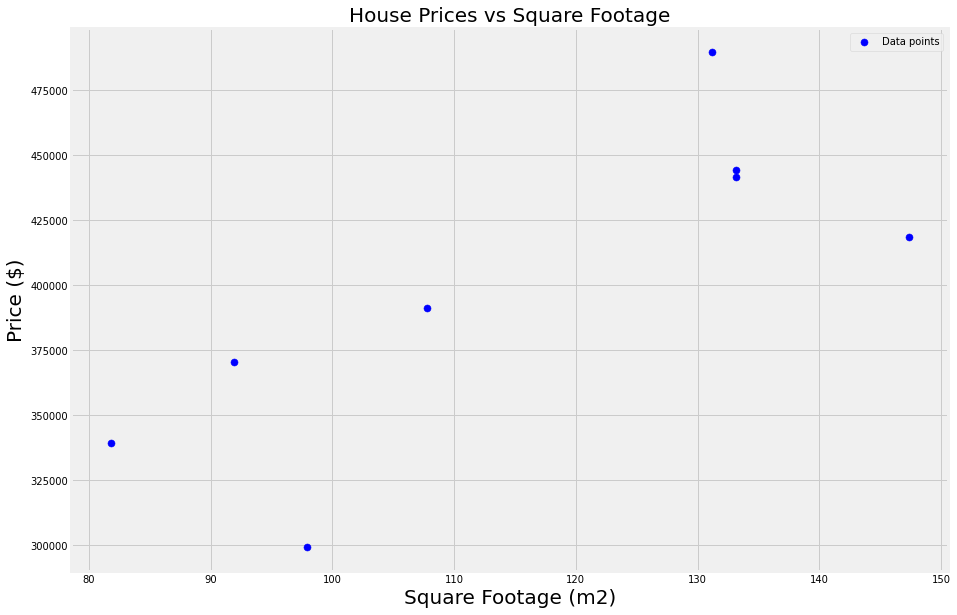

In [289]:
# Plotting the dataset to visualize the sparsity and high variance
plt.figure(figsize=(14,10))
plt.scatter(X, Y, color='blue', label='Data points', s=50)
plt.title('House Prices vs Square Footage', fontsize=20)
plt.xlabel('Square Footage (m2)', fontsize=20)
plt.ylabel('Price ($)', fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

In [290]:
# Create the features and response
X = df.loc[:, 'Square_footage']
y = df.loc[:, 'Price']

# Implement OLS 


Coefficients: 1771.9
Intercept: 185807.91


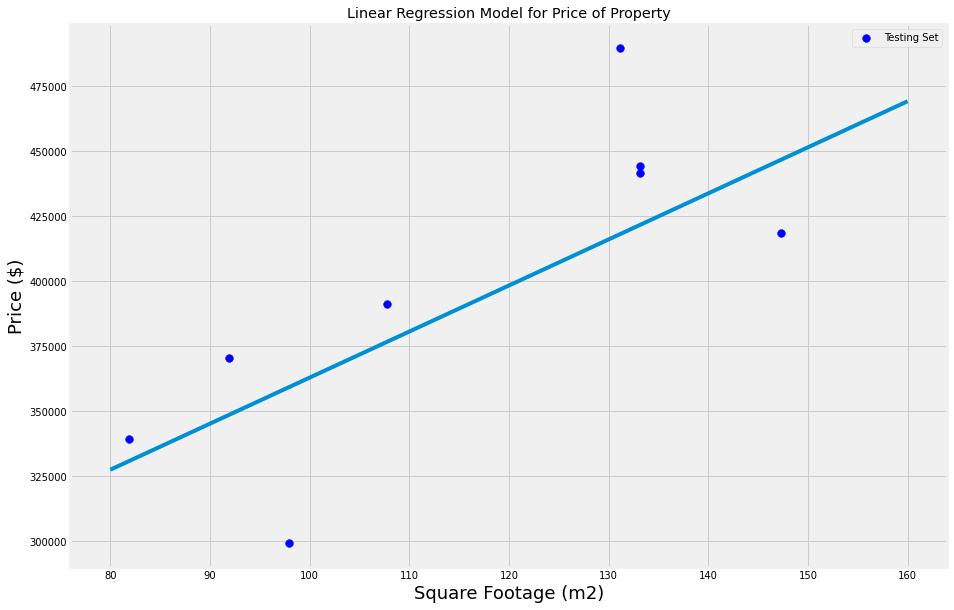

In [292]:
# reshape the data 
sq_footage = df['Square_footage'].values.reshape(-1, 1)

# ages_reshaped = ages.reshape(-1, 1)
price = df['Price'].values

X_train, X_test, y_train, y_test = train_test_split(sq_footage, price, test_size=0.1, random_state=42)

# create an instance of the LinearRegression class
model = LinearRegression()

# train the model on the training set
model.fit(X_train, y_train)

# get coefficients and intercept
lr_coefficient = round(model.coef_[0],2)
lr_intercept = round(model.intercept_,2)

# print coefficients and intercept
print(f'\nCoefficients: {lr_coefficient}') # Out: Coefficients: [0.49967695]
print(f'Intercept: {lr_intercept}') # Out: Intercept: 10.731323827720102

plt.figure(figsize=(14,10))
plt.scatter(sq_footage, price, label='Testing Set', color='blue', s=60) # original data points of test dataset
x = np.linspace(80, 160, 10) # constructs a numpy array of [0.0, 1.0, ... 10.0]
m=lr_coefficient
c=int(lr_intercept)
plt.plot(x, m*x+(c), linestyle='solid') 
plt.xlabel('Square Footage (m2)', fontsize=18)
plt.ylabel('Price ($)', fontsize=18)
plt.title('Linear Regression Model for Price of Property')
plt.legend()
plt.show()

In [271]:
sample_x = np.array([125]).reshape((-1, 1))
sample_x_pred = model.predict(sample_x)
print(f"Predicted value for x={sample_x[0][0]} is: {round(sample_x_pred[0])}")

Predicted value for x=125 is: 425436


# BLR

In [ ]:
# Coefficients: 1771.9
# Intercept: 185807.91

In [403]:
with pm.Model() as linear_model:
    
    # LR Coefficient: 1771.9
    # LR Intercept: 185807.91
    
    # Intercept
    intercept = pm.Normal('intercept', mu = 185000, sigma = 10000)
    
    # Slope 
    slope = pm.Normal('slope', mu = 1700, sigma = 500)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sigma = 50000)
    
    # Expected value for the BLR model
    mu= (slope*df['Square_footage']) + intercept #y=mx + c
    
    # Defining the likelihood function
    # Specifies the observed data comes from a normal distribution with mean mu and std sigma.
    y_hat= pm.Normal("y_hat", mu = mu, sigma=sigma, observed=df['Price'])
    
    # Generating 1000 samples from the posterior distribution
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, slope, sigma]


Output()

Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 5 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


array([[<AxesSubplot: title={'center': 'intercept'}>,
        <AxesSubplot: title={'center': 'intercept'}>],
       [<AxesSubplot: title={'center': 'slope'}>,
        <AxesSubplot: title={'center': 'slope'}>]], dtype=object)

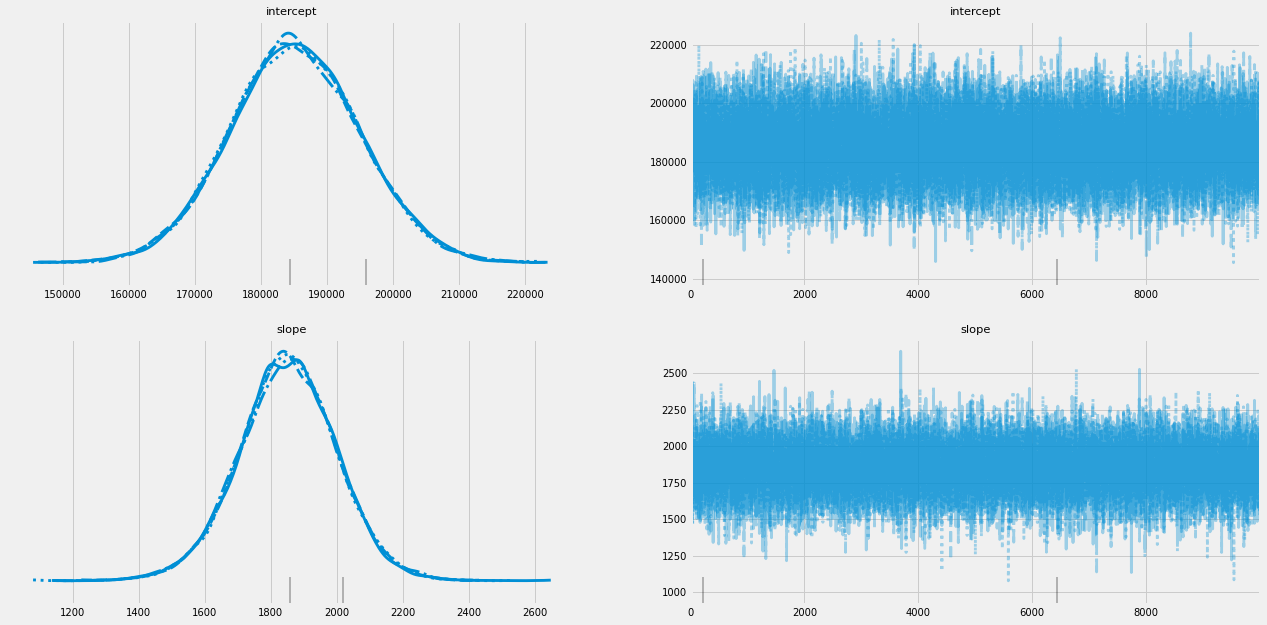

In [422]:
az.plot_trace(trace, var_names=["intercept", "slope"], figsize=(20,10))

In [405]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,185140.004,9835.838,167195.771,204273.034,64.973,45.943,22913.0,25495.0,1.0
slope,1850.947,148.824,1568.759,2130.084,1.030,0.728,20989.0,23279.0,1.0
sigma,43057.140,12102.543,23843.336,65555.503,81.244,58.280,23254.0,21208.0,1.0


# Plotting BLR

In [407]:
square_footage=df['Square_footage']
price=df['Price']

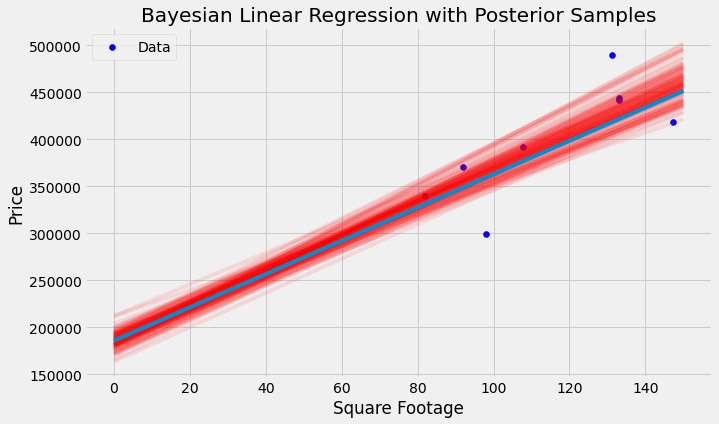

In [425]:
# Plotting the data and regression lines
plt.figure(figsize=(10, 6))
plt.scatter(square_footage, price, color='blue', label='Data')

# Extract samples from the posterior
intercept_samples = trace.posterior['intercept'].values.flatten()
square_footage_coeff_samples = trace.posterior['slope'].values.flatten()

# Plot multiple regression lines from posterior samples
x_vals = np.linspace(0, 150, 100) # constructs a numpy array of [0.0, 1.0, ... 10.0]
idx = np.random.choice(len(intercept_samples), 100, replace=False)

for i in idx:
    
    # Get a gradient - The i-th sampled intercept
    m_i = square_footage_coeff_samples[i]
    
    # Get an intercept - The i-th sampled intercept
    c_i = intercept_samples[i]
        
    # Calculate the corresponding Y value for all our x-values
    y_vals = m_i * x_vals +  (c_i)
    
    # Plot the Y-value
    plt.plot(x_vals, y_vals, color='red', linestyle='solid', alpha=0.1)

# Plot LINEAR REGRESSION
m=lr_coefficient
c=lr_intercept
plt.plot(x_vals, m*x_vals+(c), linestyle='solid') 

plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Bayesian Linear Regression with Posterior Samples')
plt.legend()
plt.show()

# BLR Point Estimate

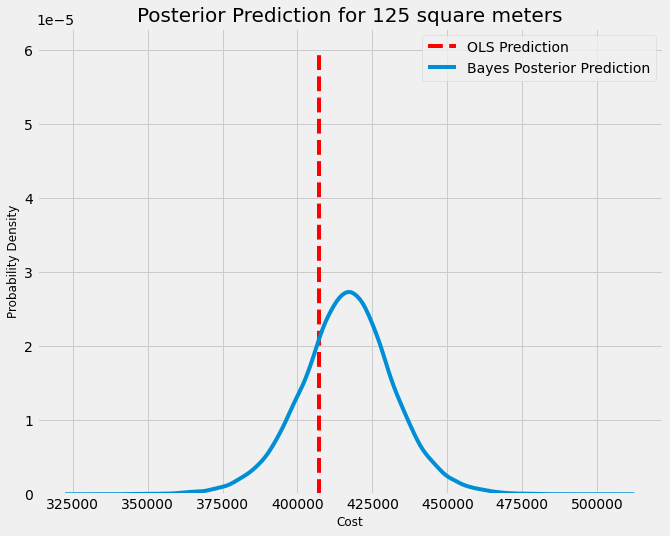

In [427]:
test_value=125

bayes_intecept= trace.posterior['intercept'].values.flatten()
bayes_gradient=trace.posterior['slope'].values.flatten()

bayes_prediction =bayes_intecept + bayes_gradient* test_value

plt.figure(figsize = (10, 8))
plt.style.use('fivethirtyeight')

plt.vlines(x = c + m * test_value, 
           ymin = 0, ymax = .00006, 
           label = 'OLS Prediction',
          colors = 'red', linestyles='--')

sns.kdeplot(bayes_prediction, label = 'Bayes Posterior Prediction')

plt.legend()
plt.xlabel('Cost', size = 12)
plt.ylabel('Probability Density', size = 12)
plt.title(f'Posterior Prediction for {test_value} square meters', size = 20)
plt.show()